In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

Phi: 72.203066 +/- 0.326702
Theta: 64.199352 or +/- 0.442497
Phi(naive): 75.843000
Theta(naive): 67.766834


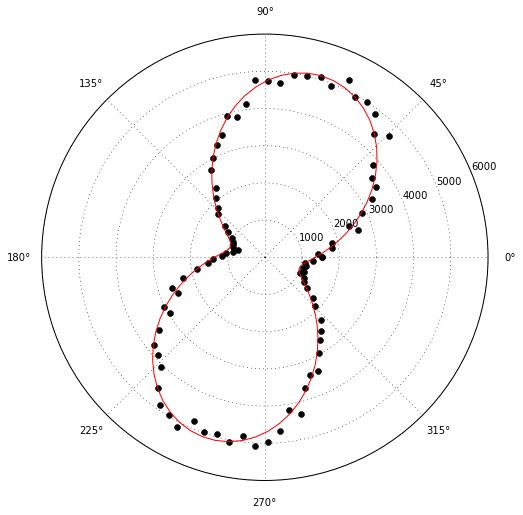

In [2]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 Rotor Sweep 1')
T1[:,1] -= 1459
OrientPol(T1,False)

[  7.52686221e+02   8.03075615e-03   4.35717695e+00   5.94422124e+02
   8.84637176e+03]
(130.43925892767143, 93.76710954984874)


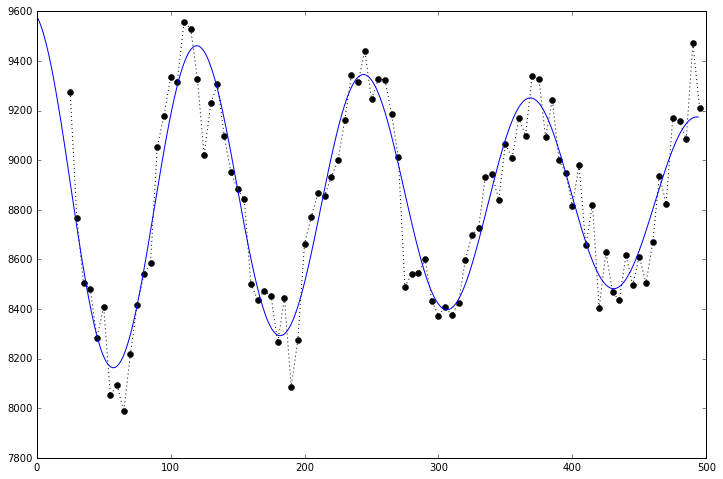

In [70]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V Rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

[  8288.1082467    2194.98255224  64174.13338843]
(66860.059999999998, 0.0038673779700458049, 0.0046406703978093353)


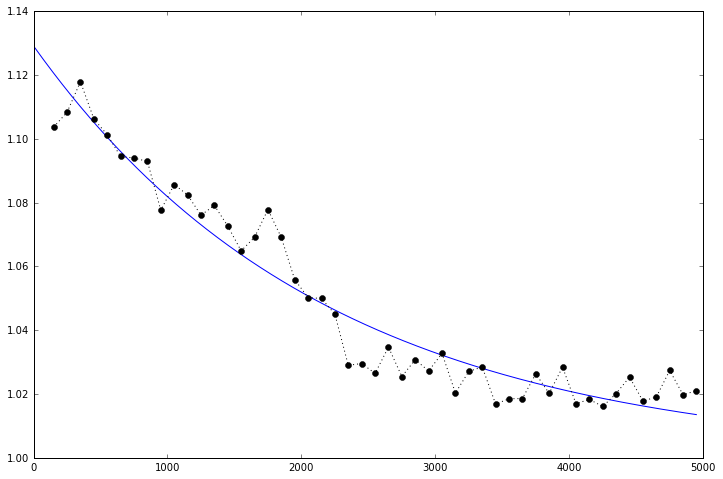

In [32]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V 2 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V 2 hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

In [22]:
(2865-2708)

157

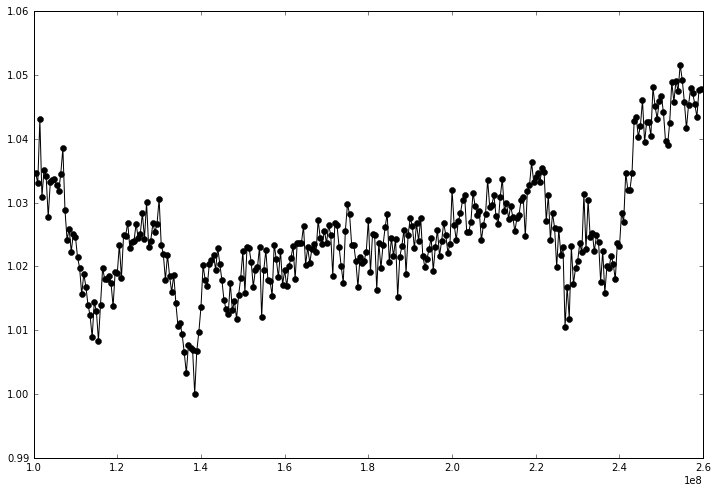

In [27]:
rf = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V tau1us RF sweep')
plt.plot(rf[1:,0],rf[1:,1]/np.min(rf[1:,1]),'ko-')

[  5404.06088337   1763.76927869  46815.42883896]
(48144.440000000002, 0.0045575026541655565, 0.0048878056016055209)


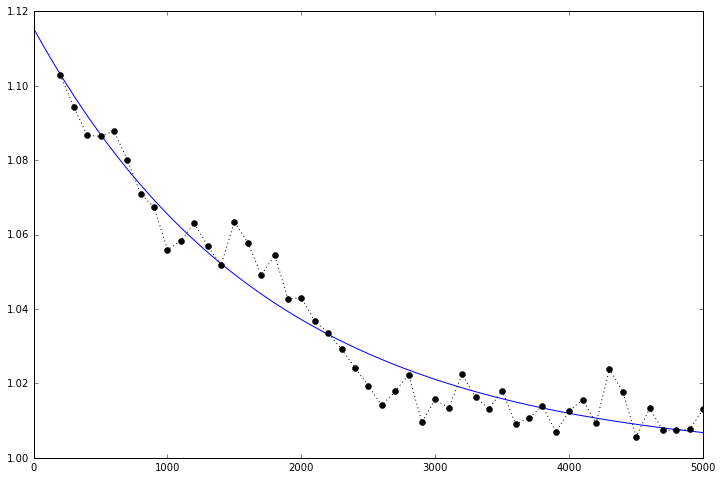

In [31]:
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF157 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF157 hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[  4146.57550052   1334.59367448  47417.56044365]
(48060.580000000002, 0.0045614770714311617, 0.004142960959461213)


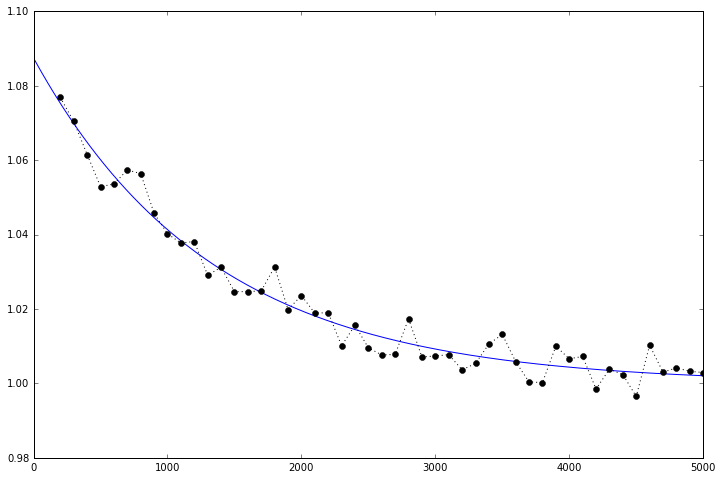

In [36]:
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF137.5 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF137.5 hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[  5810.31479663   1811.15924381  46753.76635737]
(48255.459999999999, 0.0045522569752312163, 0.0027560585279070185)


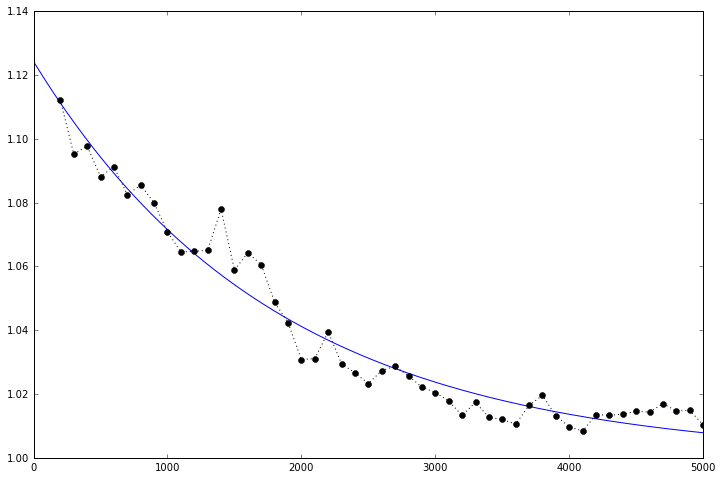

In [39]:
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF260 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF260 hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[  8.66605392e+02   4.41341856e-03   2.37836376e+02   3.25858019e+02
   6.80061593e+04]
(295.57450520425232, 260.14895733021876)


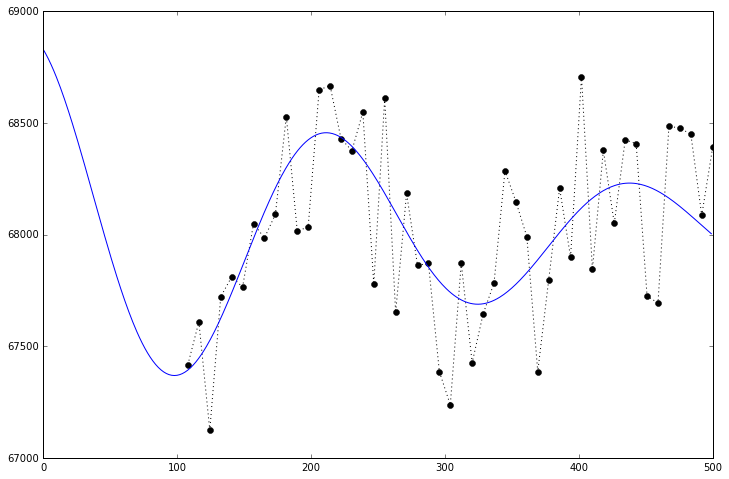

In [72]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF137.5 2 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-6-16\MNP 4 on CPW 0.5mW scan 1 x159 y152 d85.8 th73 d2.3 B0.29V RF137.5 2 rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

[  2.87882474e+02   7.67865441e-03   6.49902603e-01   7.46107317e+02
   6.84871171e+03]
(111.86922431483055, 82.522093001409829)


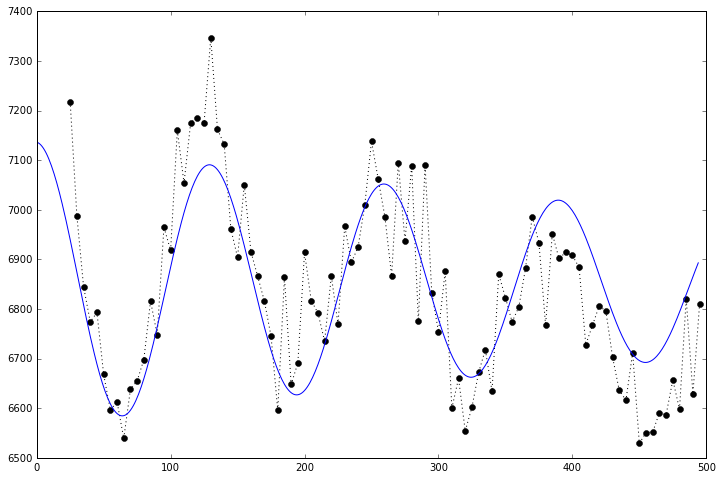

In [73]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-7-16\MNP 4 on CPW scan 1 5mW x154 y157 t85.8 th73 d2.3 B1V rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-7-16\MNP 4 on CPW scan 1 5mW x154 y157 t85.8 th73 d2.3 B1V rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

[  3331.34005363    433.46865419  39783.12667976]
(39745.599999999999, 0.0050159762472177308, 0.0066129100161353557)


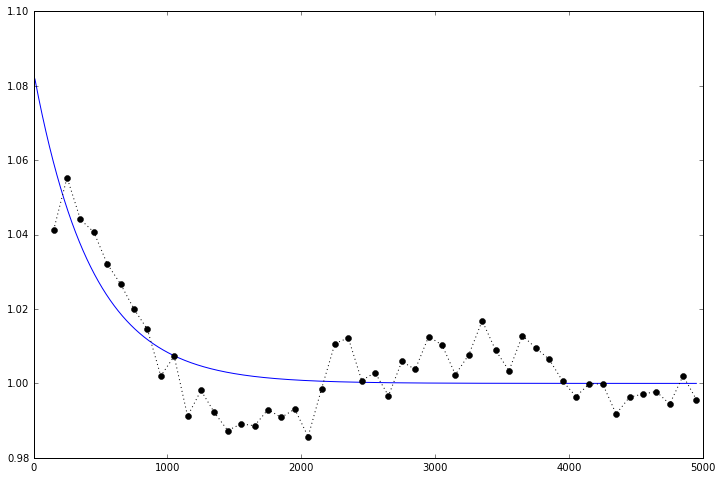

In [45]:
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-7-16\MNP 4 on CPW scan 1 5mW x154 y157 t85.8 th73 d2.3 B1V hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-7-16\MNP 4 on CPW scan 1 5mW x154 y157 t85.8 th73 d2.3 B1V hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

In [75]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-9-16\MNP 4 on CPW scan 1 5mW x154 y157 t85.8 th73 d2.3 B0.4V rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-9-16\MNP 4 on CPW scan 1 5mW x154 y157 t85.8 th73 d2.3 B0.4V rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

ZeroDivisionError: long division or modulo by zero

[ -3.38032923e+02   2.10340878e-03   2.66757020e+02   5.94275021e+02
   8.95782825e+03]
(96.044751361941309, 94.42284400179733)


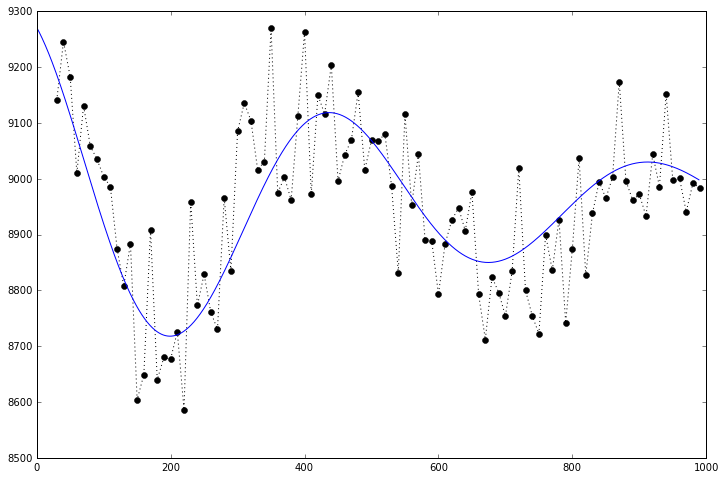

In [76]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -21dbm rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -21dbm rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

[ -6.27425852e+02   3.21720470e-03   1.62057385e+02   3.34472426e+02
   8.52310747e+03]
(113.45174517855332, 92.253516682054922)


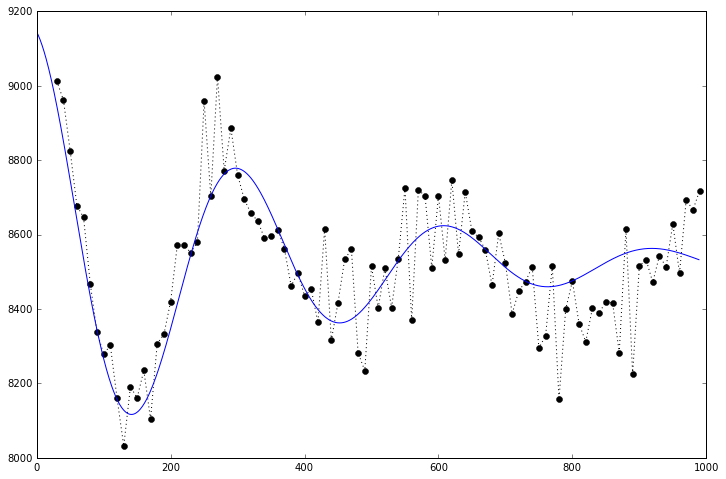

In [82]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -18 dbm rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -18 dbm rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0[1:])))

[ -6.27425852e+02   3.21720470e-03   1.62057385e+02   3.34472426e+02
   8.52310747e+03]
(201.19137580167222, 226.0372032731438, 0.0049703919763726193, 0.0055842030854147719)
(226.03720327314383, 200.70159441319842)


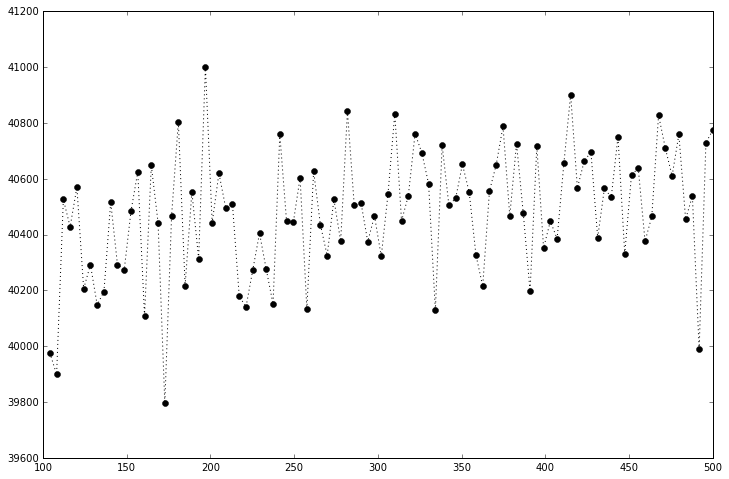

In [84]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -9dbm tau500ns RF 258MHz -4dbm 2 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -9dbm tau500ns RF 258MHz -4dbm 2 rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
#plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.sqrt(np.mean(rabi0[1:])),np.std(rabi0[1:]),1/np.sqrt(np.mean(rabi0[1:])),np.std(rabi0[1:])/np.mean(rabi0[1:]))
print (np.std(rabi0[1:]-np.mean(rabi0[1:])),np.sqrt(np.mean(rabi0)))

[  9.32632518e+00   9.22063916e-03   1.51018680e+00   4.92272262e+02
   1.00769452e+02]


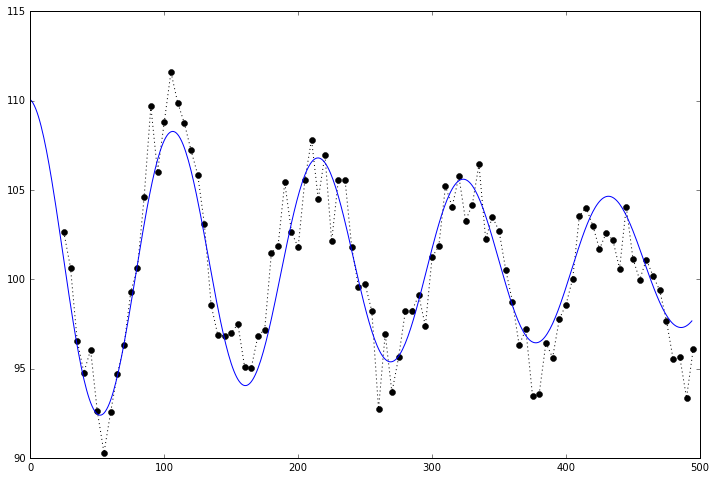

In [92]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -9dbm rabi *[3-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -9dbm rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
#print (np.sqrt(np.mean(rabi0[1:])),np.std(rabi0[1:]),1/np.sqrt(np.mean(rabi0[1:])),np.std(rabi0[1:])/np.mean(rabi0[1:]))
#print (np.std(rabi0[1:]-np.mean(rabi0[1:])),np.sqrt(np.mean(rabi0)))

[  7593.79596458   1136.15069946  55463.40340789]
(56651.540000000001, 0.0042014010529816941, 0.0037933720602043451)


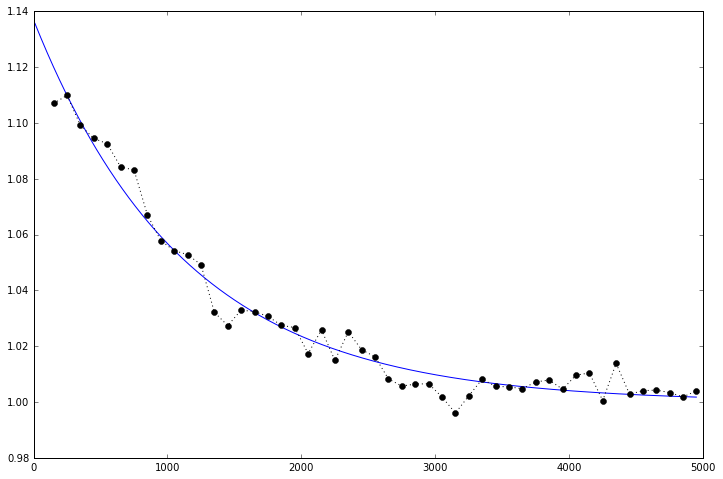

In [93]:
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -9dbm hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -9dbm hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

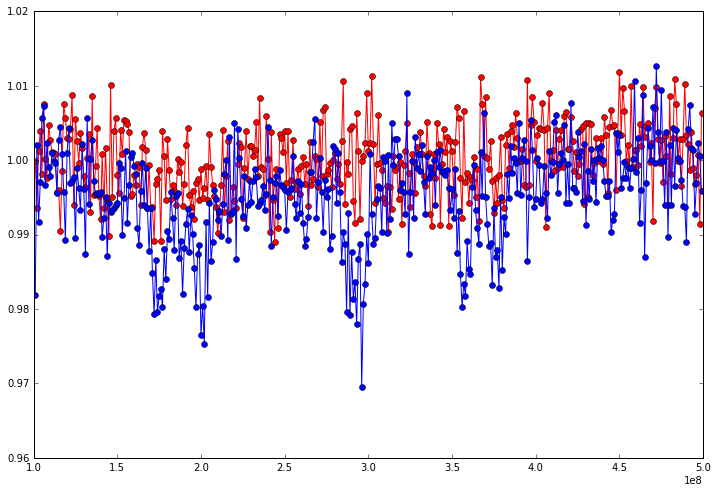

In [4]:
rf = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-10-16\MNP 4 on CPW 5mW x157 y142 B0.4V -9dbm tau1us RF with Ref Sweep')
plt.plot(rf[1:,0],rf[1:,2]/np.mean(rf[1:,2]),'ro-')
plt.plot(rf[1:,0],rf[1:,1]/np.mean(rf[1:,2]),'bo-')